26.330555555555556


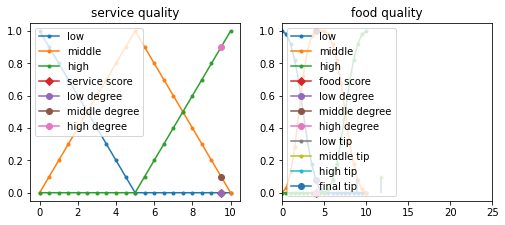

In [1]:
# sugeno

import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

x_service = np.arange(0, 10.01, 0.5)
x_food = np.arange(0, 10.01, 0.5)
x_tip = np.arange(0, 25.01, 1.0)

service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

food_low = fuzz.zmf(x_food, 0, 5)
food_middle = fuzz.pimf(x_food, 0, 4, 5, 10)
food_high = fuzz.smf(x_food, 5, 10)

service_score = 9.5
food_score = 4.0

service_low_degree = fuzz.interp_membership(
    x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(
    x_service, service_middle, service_score)
service_high_degree= fuzz.interp_membership(
    x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize = (6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("service quality")
plt.plot(x_service, service_low, label = "low", marker = ".")
plt.plot(x_service, service_middle, label = "middle", marker = ".")
plt.plot(x_service, service_high, label = "high", marker = ".")
plt.plot(service_score, 0.0, label = "service score", marker = "D")
plt.plot(service_score, service_low_degree,
    label = "low degree", marker = "o")
plt.plot(service_score, service_middle_degree,
    label = "middle degree", marker = "o")
plt.plot(service_score, service_high_degree,
    label = "high degree", marker = "o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("food quality")
plt.plot(x_food, food_low, label = "low", marker = ".")
plt.plot(x_food, food_middle, label = "middle", marker = ".")
plt.plot(x_food, food_high, label = "high", marker = ".")
plt.plot(food_score, 0.0, label = "food score", marker = "D")
plt.plot(food_score, food_low_degree,
    label = "low degree", marker = "o")
plt.plot(food_score, food_middle_degree,
    label = "middle degree", marker = "o")
plt.plot(food_score, food_high_degree,
    label = "high degree", marker = "o")
plt.legend(loc="upper left")

low_degree = np.fmax(service_low_degree, food_low_degree)

middle_degree = service_middle_degree

high_degree = np.fmax(service_high_degree, food_high_degree)

w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.5 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score +  0.5 * service_score
z3 = 5 * 1.0 * food_score + 1.0* service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot (z1 , w1 , label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2 , w2 , label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3 , w3 , label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")